# Image processing

In [85]:
from PIL import Image
from matplotlib import pylab as plt
import numpy as np
import os
import time
import re
from subprocess import Popen, PIPE

In [2]:
%matplotlib inline

In [3]:
image = Image.open('test.png')
image_gs = image.convert('LA')

In [40]:
?image

In [4]:
image.size

(476, 474)

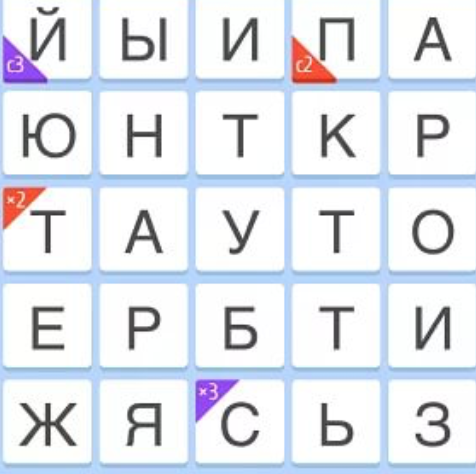

In [5]:
image

In [6]:
image.size

(476, 474)

In [79]:
image_data = np.asarray(image)


In [14]:
range(80, 130)

range(80, 130)

In [25]:
image_data.shape

(474, 476, 4)

In [61]:
image_mod = np.zeros(shape=image_data.shape)
image_mod.shape

(474, 476, 4)

In [81]:
def extract_gs_letters(image_data):
    image_mod = np.zeros(shape=image_data.shape)
    for i in range(image_data.shape[0]):
        for j in range(image_data.shape[1]):
            if image_data[i][j][0] < 150 and image_data[i][j][1] < 150 and image_data[i][j][2] < 150:
                image_mod[i][j] = image_data[i][j]
            else:
                image_mod[i][j] = (255, 255, 255, 255) 
    return image_mod

In [64]:
im = Image.fromarray(np.uint8(image_mod))
im.save("test_mod.png")

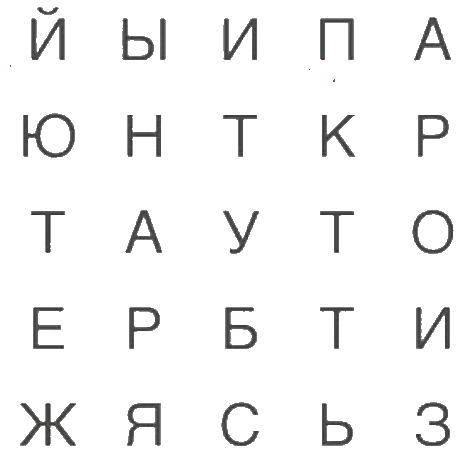

In [65]:
im

In [74]:
def run_shell(cmd):
    p = Popen(cmd, shell=True, stdout=PIPE, stderr=PIPE)
    p.communicate()
    if p.returncode != 0:
        return False
    return True

In [88]:
def run_tesseract(image_name):
    cmd = "tesseract " + image_name + " res" + " -l" + " rus" 
    run_shell(cmd)

In [77]:
run_tesseract("test_mod.png")

In [78]:
with open('res.txt') as f:
    print(f.read())

ИЫ

ИПА
юнткр

ТАУТО
ЕРБТИ
ЖЯСЬЗ




In [89]:
def detect_letters(image_name):
    start = time.time()
    image = Image.open(image_name)
    image_data = np.asarray(image)
    image_mod = extract_gs_letters(image_data)
    image_letters = Image.fromarray(np.uint8(image_mod))
    image_letters.save("image_letters.png")
    run_tesseract("image_letters.png")
    with open('res.txt') as f:
        text = f.read()
    text = re.sub(r"(\n)", "", text.lower())
    print(text)
    print("Detected in %f seconds" %(time.time() - start))



In [90]:
detect_letters('test.png')

иыипаюнткртаутоербтижясьз
Detected in 1.612026 seconds


1024


(array([  1.01600000e+03,   4.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([      0. ,   22562.4,   45124.8,   67687.2,   90249.6,  112812. ,
         135374.4,  157936.8,  180499.2,  203061.6,  225624. ]),
 <a list of 10 Patch objects>)

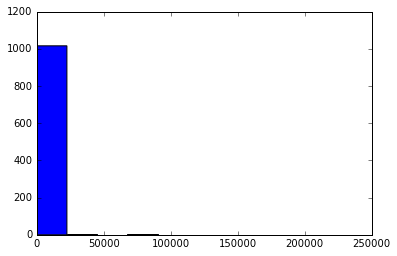

In [14]:
X = image.histogram()
print(len(X))
plt.hist(X)

## OpenCV

In [66]:
import cv2
print(cv2.__version__)

3.1.0


In [67]:
img = cv2.imread('test.png')

In [68]:
img

array([[[239, 208, 187],
        [235, 206, 190],
        [241, 218, 204],
        ..., 
        [254, 255, 253],
        [254, 255, 253],
        [254, 248, 233]],

       [[240, 208, 187],
        [237, 206, 189],
        [242, 218, 204],
        ..., 
        [255, 255, 252],
        [255, 255, 252],
        [255, 248, 233]],

       [[241, 207, 186],
        [238, 206, 189],
        [243, 218, 203],
        ..., 
        [255, 255, 252],
        [255, 255, 252],
        [255, 248, 233]],

       ..., 
       [[253, 212, 178],
        [253, 211, 177],
        [253, 211, 177],
        ..., 
        [252, 215, 181],
        [253, 215, 181],
        [253, 215, 182]],

       [[253, 210, 176],
        [253, 210, 175],
        [253, 209, 174],
        ..., 
        [251, 213, 179],
        [252, 213, 179],
        [253, 214, 181]],

       [[253, 214, 180],
        [253, 214, 179],
        [253, 213, 179],
        ..., 
        [253, 215, 181],
        [253, 215, 181],
        [253, 215,

In [73]:
img_rgb = cv2.imread('test.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('template.png',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2.imwrite('res_template_found.png',img_rgb)

True